###  **Libraries And Utilities**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### **Load Dataset from hugging face**

In [ ]:
from datasets import load_dataset

ds = load_dataset("Nnaodeh/Stroke_Prediction_Dataset")

README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Healthcare-stroke-data.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/5110 [00:00<?, ? examples/s]

In [ ]:
df = ds['train'].to_pandas()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
pd.set_option('display.max_columns', None)
print("Dataset shape",df.shape)

Dataset shape (5110, 12)


In [ ]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
df.ndim #Dimension

2

In [ ]:
df.size #Total_element

61320

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.describe() #Basic statistical infos

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### **Duplicaate**

In [ ]:
df.duplicated().sum()

np.int64(0)

### **Null Values**

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Only bmi has 201 null value, and fill with mean value of bmi

In [ ]:
df=df.fillna(value=df['bmi'].mean())

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [ ]:
df = df.drop('id', axis=1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
print(df.columns)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [ ]:
categorical_features = []
numerical_features = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_features.append(column)
    else:
        numerical_features.append(column)

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
Numerical Features: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [ ]:
unique_values = {}
for column in categorical_features:
    unique_values[column] = df[column].unique()

In [ ]:
for col,values in unique_values.items():
    print(f"{col}: {values}")

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
df['stroke'].value_counts(normalize=True)*100

,proportion
stroke,
0,95.127202
1,4.872798


## Exploratory Data Analysis

In [ ]:
import plotly.express as px

fig = px.pie(df, names='stroke', title='Stroke Distribution')
fig.show()

In [ ]:
px.bar(x=df['stroke'].value_counts().index, y=df['stroke'].value_counts().values, title='Stroke Distribution')

In [ ]:
df[numerical_features].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


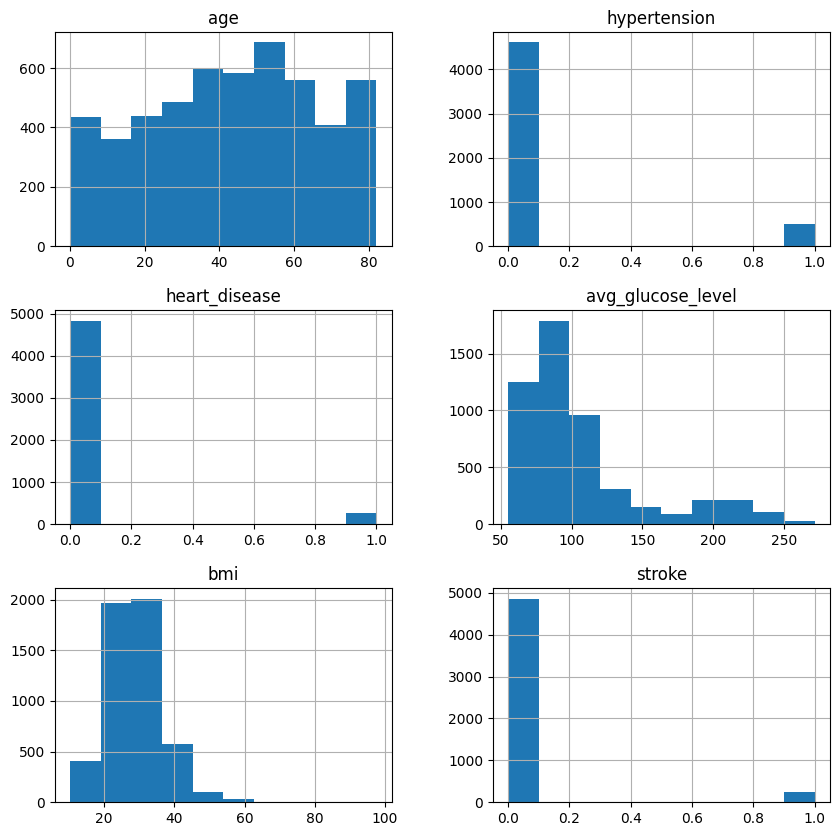

In [ ]:
df[numerical_features].hist(figsize=(10, 10))
plt.show()

In [ ]:
fig=px.histogram(df,x='gender',width=400)
fig.show()

In [ ]:
round(df[df['gender']=='Male']['stroke'].mean()*100,2)

np.float64(5.11)

In [ ]:
round(df[df['gender']=='Female']['stroke'].mean()*100,2)

np.float64(4.71)

In [ ]:
fig=px.histogram(df,x='hypertension',width=400)
fig.show()

In [ ]:
round(df[df['hypertension']==1]['stroke'].mean()*100,2)

np.float64(13.25)

In [ ]:
round(df[df['hypertension']==0]['stroke'].mean()*100,2)

np.float64(3.97)

In [ ]:
fig=px.histogram(df,x='heart_disease',width=400)
fig.show()

In [ ]:
round(df[df['heart_disease']==1]['stroke'].mean()*100,2)

np.float64(17.03)

In [ ]:
round(df[df['heart_disease']==0]['stroke'].mean()*100,2)

np.float64(4.18)

In [ ]:
fig=px.histogram(df,x='ever_married',width=400)
fig.show()

In [ ]:
round(df[df['ever_married']=='Yes']['stroke'].mean()*100,2)

np.float64(6.56)

In [ ]:
round(df[df['ever_married']=='No']['stroke'].mean()*100,2)

np.float64(1.65)

In [ ]:
fig=px.histogram(df,x='work_type',width=400)
fig.show()

In [ ]:
for work_type_value in df['work_type'].unique():
    stroke_mean = round(df[df['work_type'] == work_type_value]['stroke'].mean() * 100, 2)
    print(f"Stroke mean for work_type '{work_type_value}': {stroke_mean}%")

Stroke mean for work_type 'Private': 5.09%
Stroke mean for work_type 'Self-employed': 7.94%
Stroke mean for work_type 'Govt_job': 5.02%
Stroke mean for work_type 'children': 0.29%
Stroke mean for work_type 'Never_worked': 0.0%


In [ ]:
fig=px.histogram(df,x='Residence_type',width=400)
fig.show()

In [ ]:
for residence_type_value in df['Residence_type'].unique():
    stroke_mean = round(df[df['Residence_type'] == residence_type_value]['stroke'].mean() * 100, 2)
    print(f"Stroke mean for Residence_type '{residence_type_value}': {stroke_mean}%")

Stroke mean for Residence_type 'Urban': 5.2%
Stroke mean for Residence_type 'Rural': 4.53%


In [ ]:
fig=px.histogram(df,x='smoking_status',width=400)
fig.show()

In [ ]:
for smoking_status_value in df['smoking_status'].unique():
    stroke_mean = round(df[df['smoking_status'] == smoking_status_value]['stroke'].mean() * 100, 2)
    print(f"Stroke mean for smoking_status '{smoking_status_value}': {stroke_mean}%")

Stroke mean for smoking_status 'formerly smoked': 7.91%
Stroke mean for smoking_status 'never smoked': 4.76%
Stroke mean for smoking_status 'smokes': 5.32%
Stroke mean for smoking_status 'Unknown': 3.04%


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Make a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

print("Mutual Information Scores for Categorical Features with 'stroke':\n")

# Iterate through each categorical feature and calculate mutual information
for col in categorical_features:
    # Encode the categorical column
    df_encoded[col + '_encoded'] = le.fit_transform(df_encoded[col])

    # Calculate mutual information
    mi_score = mutual_info_classif(df_encoded[[col + '_encoded']], df_encoded['stroke'], discrete_features=True)

    print(f"{col}: {mi_score[0]:.4f}")

Mutual Information Scores for Categorical Features with 'stroke':

gender: 0.0001
ever_married: 0.0069
work_type: 0.0068
Residence_type: 0.0001
smoking_status: 0.0028


In [ ]:
df[numerical_features].corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


1. Weak positive relationship(.25) between age and strok.

2. Slight difference in avg. glucose levels between stroke/no stroke

3. BMI shows no significant relation to stroke.

4. Hypertension increases stroke risk by 3.3x.

5. Males slightly more likely to have stroke then females.

6. Heart Disease increases stroke risk by 4.07x.

7. Married individuals 5.7x more likely to have stroke.

8. Self-employed individuals have higher stroke probability.

9. Rural residents slightly more likely to have stroke than urban.

10. Little difference in stroke risk between smokers and non-smokers.

In [ ]:
from jax import transfer_guard
from sklearn.model_selection import cross_val_score,RepeatedKFold
from sklearn.preprocessing import PowerTransformer,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

numerical=['avg_glucose_level','bmi','age']
categorical=['hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']

transformer=ColumnTransformer(
    transformers=[
        ('num',Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),PowerTransformer(method='yeo-johnson',standardize=True)]),numerical),
        ('cat',OneHotEncoder(),categorical)
    ])
pipeline=Pipeline(steps=[('transformer',transformer),('smote',SMOTE())])

## KNN

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
# Use the dataframe created in the upper data preprocessing cell
# Example: df_processed = df  (if your variable name was df)
df_processed = df.copy()
df_processed.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
X = df_processed.drop("stroke", axis=1)
y = df_processed["stroke"]

In [ ]:
class KNN_From_Scratch:

    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        # Explicitly convert y to a NumPy array to ensure positional indexing
        self.y_train = np.asarray(y)

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict_point(self, x):
        # Compute distances with all train points
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]

        # Get k nearest indices
        k_idx = np.argsort(distances)[:self.k]

        # Get labels of k nearest neighbors using positional indexing
        k_labels = [self.y_train[i] for i in k_idx]

        # Majority vote
        return Counter(k_labels).most_common(1)[0][0]

    def predict(self, X):
        y_pred = [self.predict_point(x) for x in X]
        return np.array(y_pred)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline # Alias imblearn's Pipeline
from sklearn.pipeline import Pipeline # Import sklearn's Pipeline for internal use in ColumnTransformer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE

# Re-define X and y from df_processed to ensure they are DataFrames/Series
X = df_processed.drop("stroke", axis=1)
y = df_processed["stroke"]

# Re-define the numerical and categorical features (from the original notebook)
numerical = ['avg_glucose_level', 'bmi', 'age']
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] # Added 'gender'

# Define the numerical pipeline separately to ensure it's a sklearn.pipeline.Pipeline
numerical_transformer_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('power_transform', PowerTransformer(method='yeo-johnson', standardize=True))
])

# Re-define the ColumnTransformer with the explicitly defined sklearn.pipeline.Pipeline for numerical steps
transformer = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_pipeline, numerical),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
    ]
)

# Re-define the main pipeline using imblearn.pipeline.Pipeline
pipeline = ImbPipeline(steps=[('transformer', transformer), ('smote', SMOTE(random_state=42))])

# Apply the preprocessing pipeline (ColumnTransformer and SMOTE)
X_resampled, y_resampled = pipeline.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_train value counts:\n", y_train.value_counts())
print("y_test value counts:\n", y_test.value_counts())

X_train shape: (6805, 23)
X_test shape: (2917, 23)
y_train shape: (6805,)
y_test shape: (2917,)
y_train value counts:
 stroke
1    3403
0    3402
Name: count, dtype: int64
y_test value counts:
 stroke
0    1459
1    1458
Name: count, dtype: int64


In [ ]:
model = KNN_From_Scratch(k=5)
# Use the existing X_train and y_train for fitting
model.fit(X_train, y_train)

# Use the existing X_test for prediction
y_pred = model.predict(X_test)

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# For ROC-AUC we need probabilities
# Instead, compute using distance-based similarity (manual probability approx)

def knn_predict_proba(model, X):
    probs = []
    for x in X:
        distances = [model.euclidean_distance(x, t) for t in model.X_train]
        k_idx = np.argsort(distances)[:model.k]
        k_labels = [model.y_train[i] for i in k_idx]
        prob = sum(k_labels) / model.k   # Probability = ratio of positive class
        probs.append(prob)
    return np.array(probs)

y_proba = knn_predict_proba(model, X_test)

roc = roc_auc_score(y_test, y_proba)

# Print All Metrics
print("Confusion Matrix:\n", cm)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[1189  270]
 [   4 1454]]
Accuracy: 0.906067877956805
Precision: 0.8433874709976799
Recall: 0.9972565157750343
F1 Score: 0.9138906348208674
ROC-AUC Score: 0.9602631977292451

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.81      0.90      1459
           1       0.84      1.00      0.91      1458

    accuracy                           0.91      2917
   macro avg       0.92      0.91      0.91      2917
weighted avg       0.92      0.91      0.91      2917



In [ ]:
for k in [1, 3, 5, 7, 9, 11]:
    model = KNN_From_Scratch(k=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"K = {k} → Accuracy = {accuracy_score(y_test, y_pred):.4f}")

K = 1 → Accuracy = 0.9479
K = 3 → Accuracy = 0.9260
K = 5 → Accuracy = 0.9061
K = 7 → Accuracy = 0.8927
K = 9 → Accuracy = 0.8804
K = 11 → Accuracy = 0.8663


#SVM

In [ ]:
df_processed.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
# Re-define X and y from df_processed to ensure they are DataFrames/Series
X_svm = df_processed.drop("stroke", axis=1)
y_svm = df_processed["stroke"]

# Redefine the numerical and categorical features for this context
numerical_svm = ['avg_glucose_level', 'bmi', 'age']
categorical_svm = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Define the numerical pipeline
numerical_transformer_pipeline_svm = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('power_transform', PowerTransformer(method='yeo-johnson', standardize=True))
])

# Define the ColumnTransformer
transformer_svm = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_pipeline_svm, numerical_svm),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_svm)
    ]
)

# Apply the preprocessing pipeline to X
X_processed_svm = transformer_svm.fit_transform(X_svm)

# Convert 0 → -1 for SVM target variable
y_svm_transformed = np.where(y_svm == 0, -1, 1)

# Train-test split using the processed X and transformed y
X_train, X_test, y_train, y_test = train_test_split(
    X_processed_svm, y_svm_transformed, test_size=0.2, random_state=42, stratify=y_svm_transformed
)

In [ ]:
class SVM_Scratch:

    def __init__(self, lr=0.001, lambda_param=0.01, epochs=2000):
        self.lr = lr
        self.lambda_param = lambda_param
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape

        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1

                if condition:
                    # No hinge loss
                    dw = self.lambda_param * self.w
                    db = 0
                else:
                    # Hinge loss gradient
                    dw = self.lambda_param * self.w - y[idx] * x_i
                    db = -y[idx]

                # Update
                self.w -= self.lr * dw
                self.b -= self.lr * db

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)   # returns -1 or +1

    def predict_proba(self, X):
        # Map confidence to probability (sigmoid)
        scores = np.dot(X, self.w) + self.b
        return 1 / (1 + np.exp(-scores))


In [ ]:
# Instantiate, fit, and predict with SVM_Scratch
svm = SVM_Scratch(lr=0.001, lambda_param=0.01, epochs=2000)
svm.fit(X_train, y_train) # X_train, y_train are from SVM split in db5npUk-yJ3v

y_pred_svm_raw = svm.predict(X_test) # X_test is from SVM split in db5npUk-yJ3v
y_proba_svm_raw = svm.predict_proba(X_test)

# Convert predictions and true labels to binary (0/1) for standard metrics
y_pred_binary = np.where(y_pred_svm_raw == -1, 0, 1)
y_test_binary = np.where(y_test == -1, 0, 1) # y_test is from SVM split in db5npUk-yJ3v

# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test_binary, y_pred_binary, labels=[0, 1])

# Metrics for SVM
acc_svm = accuracy_score(y_test_binary, y_pred_binary)
prec_svm = precision_score(y_test_binary, y_pred_binary, pos_label=1, zero_division=0)
rec_svm = recall_score(y_test_binary, y_pred_binary, pos_label=1, zero_division=0)
f1_svm = f1_score(y_test_binary, y_pred_binary, pos_label=1, zero_division=0)
roc_svm = roc_auc_score(y_test_binary, y_proba_svm_raw) # Use raw probabilities for ROC-AUC

# Print All Metrics for SVM
print("SVM Confusion Matrix:\n", cm_svm)
print("SVM Accuracy:", acc_svm)
print("SVM Precision:", prec_svm)
print("SVM Recall:", rec_svm)
print("SVM F1 Score:", f1_svm)
print("SVM ROC-AUC Score:", roc_svm)

print("\nSVM Classification Report:")
print(classification_report(y_test_binary, y_pred_binary, target_names=['No Stroke', 'Stroke']))

SVM Confusion Matrix:
 [[972   0]
 [ 50   0]]
SVM Accuracy: 0.9510763209393346
SVM Precision: 0.0
SVM Recall: 0.0
SVM F1 Score: 0.0
SVM ROC-AUC Score: 0.8102880658436215

SVM Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.95      1.00      0.97       972
      Stroke       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
svm = SVM_Scratch(lr=0.001, lambda_param=0.01, epochs=2000)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_proba = svm.predict_proba(X_test)

In [ ]:
y_pred_binary = np.where(y_pred == -1, 0, 1)
y_test_binary = np.where(y_test == -1, 0, 1)

In [ ]:
cm = confusion_matrix(y_test_binary, y_pred_binary)
acc = accuracy_score(y_test_binary, y_pred_binary)
prec = precision_score(y_test_binary, y_pred_binary, zero_division=0)
rec = recall_score(y_test_binary, y_pred_binary, zero_division=0)
f1 = f1_score(y_test_binary, y_pred_binary, zero_division=0)
roc = roc_auc_score(y_test_binary, y_proba)

print("Confusion Matrix:\n", cm)
print("\nAccuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc)

print("\nClassification Report:")
print(classification_report(y_test_binary, y_pred_binary))

Confusion Matrix:
 [[972   0]
 [ 50   0]]

Accuracy: 0.9510763209393346
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.8102880658436215

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
for lr in [0.01, 0.001]:
    for reg in [0.1, 0.01]:
        model = SVM_Scratch(lr=lr, lambda_param=reg, epochs=2000)
        model.fit(X_train, y_train)
        pred = np.where(model.predict(X_test) == -1, 0, 1)
        print(f"LR={lr}, Lambda={reg}, Acc={accuracy_score(y_test_binary, pred):.4f}")

LR=0.01, Lambda=0.1, Acc=0.9511
LR=0.01, Lambda=0.01, Acc=0.9511
LR=0.001, Lambda=0.1, Acc=0.9511
LR=0.001, Lambda=0.01, Acc=0.9511


## Random Forest

In [ ]:
 X = df_processed.drop("stroke", axis=1).values
y = df_processed["stroke"].values  # keep as 0/1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
def gini_impurity(y):
    classes = np.unique(y)
    impurity = 1
    for c in classes:
        p = np.sum(y == c) / len(y)
        impurity -= p**2
    return impurity


def best_split(X, y):
    best_feature = None
    best_threshold = None
    best_gini = 999
    n_features = X.shape[1]

    for feature in range(n_features):
        values = np.unique(X[:, feature])
        for threshold in values:
            left_mask = X[:, feature] <= threshold
            right_mask = X[:, feature] > threshold

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue

            left_gini = gini_impurity(y[left_mask])
            right_gini = gini_impurity(y[right_mask])

            weighted_gini = (len(y[left_mask]) * left_gini +
                             len(y[right_mask]) * right_gini) / len(y)

            if weighted_gini < best_gini:
                best_gini = weighted_gini
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold


In [ ]:
class DecisionTree:
    def __init__(self, max_depth=10, min_samples_split=2, num_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.num_features = num_features
        self.tree = None

    def build(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)

        # Stop conditions
        if (len(unique_classes) == 1 or
            depth >= self.max_depth or
            n_samples < self.min_samples_split):
            return Counter(y).most_common(1)[0][0]

        # Random subset of features
        feat_idx = np.random.choice(n_features, self.num_features, replace=False)
        best_feat = None
        best_thresh = None
        best_gini = 999

        # Search best split among random features
        for feature in feat_idx:
            values = np.unique(X[:, feature])
            for threshold in values:
                left = X[:, feature] <= threshold
                right = ~left

                if sum(left) == 0 or sum(right) == 0:
                    continue

                gini_left = gini_impurity(y[left])
                gini_right = gini_impurity(y[right])
                weighted_gini = (sum(left) * gini_left +
                                 sum(right) * gini_right) / len(y)

                if weighted_gini < best_gini:
                    best_gini = weighted_gini
                    best_feat = feature
                    best_thresh = threshold

        if best_feat is None:
            return Counter(y).most_common(1)[0][0]

        left_mask = X[:, best_feat] <= best_thresh
        right_mask = X[:, best_feat] > best_thresh

        left_branch = self.build(X[left_mask], y[left_mask], depth + 1)
        right_branch = self.build(X[right_mask], y[right_mask], depth + 1)

        return {
            "feature": best_feat,
            "threshold": best_thresh,
            "left": left_branch,
            "right": right_branch
        }

    def fit(self, X, y):
        if self.num_features is None:
            self.num_features = int(np.sqrt(X.shape[1]))
        self.tree = self.build(X, y)

    def predict_one(self, x, tree=None):
        if tree is None:
            tree = self.tree

        # leaf node
        if not isinstance(tree, dict):
            return tree

        if x[tree["feature"]] <= tree["threshold"]:
            return self.predict_one(x, tree["left"])
        else:
            return self.predict_one(x, tree["right"])

    def predict(self, X):
        return np.array([self.predict_one(row) for row in X])

In [ ]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []

    def bootstrap(self, X, y):
        n_samples = len(y)
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            X_samp, y_samp = self.bootstrap(X, y)
            tree = DecisionTree(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        # majority vote
        final_pred = []
        for i in range(X.shape[0]):
            values, counts = np.unique(tree_preds[:, i], return_counts=True)
            final_pred.append(values[np.argmax(counts)])
        return np.array(final_pred)

    def predict_proba(self, X):
        # probability = fraction of trees voting for class 1
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(tree_preds, axis=0)


In [ ]:
rf = RandomForest(n_trees=10, max_depth=10, min_samples_split=2)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

In [ ]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred)

# Metrics
acc_rf = accuracy_score(y_test, y_pred)
prec_rf = precision_score(y_test, y_pred, zero_division=0)
rec_rf = recall_score(y_test, y_pred, zero_division=0)
f1_rf = f1_score(y_test, y_pred, zero_division=0)
roc_rf = roc_auc_score(y_test, y_proba)

# Print All Metrics
print("Random Forest Confusion Matrix:\n", cm_rf)
print("Random Forest Accuracy:", acc_rf)
print("Random Forest Precision:", prec_rf)
print("Random Forest Recall:", rec_rf)
print("Random Forest F1 Score:", f1_rf)
print("Random Forest ROC-AUC Score:", roc_rf)

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Confusion Matrix:
 [[970   2]
 [ 48   2]]
Random Forest Accuracy: 0.9510763209393346
Random Forest Precision: 0.5
Random Forest Recall: 0.04
Random Forest F1 Score: 0.07407407407407407
Random Forest ROC-AUC Score: 0.644156378600823

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.50      0.04      0.07        50

    accuracy                           0.95      1022
   macro avg       0.73      0.52      0.52      1022
weighted avg       0.93      0.95      0.93      1022



#XGBOOST

In [ ]:
df_processed.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
X = df_processed.drop("stroke", axis=1).values
y = df_processed["stroke"].values  # keep 0/1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def grad(pred, y):
    # Gradient of logistic loss
    return pred - y

def hess(pred, y):
    # Hessian of logistic loss
    return pred * (1 - pred)

In [ ]:
class XGBNode:
    def __init__(self, feature=None, threshold=None, left=None, right=None, leaf_value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.leaf_value = leaf_value


In [ ]:
class XGBTree:
    def __init__(self, max_depth=3, min_samples=10, lambda_=1.0):
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.lambda_ = lambda_
        self.root = None

    def build(self, X, grad, hess, depth):
        if depth >= self.max_depth or X.shape[0] < self.min_samples:
            leaf_value = -np.sum(grad) / (np.sum(hess) + self.lambda_)
            return XGBNode(leaf_value=leaf_value)

        best_gain = -1e9
        best_feat = None
        best_thresh = None

        n_samples, n_features = X.shape

        for f in range(n_features):
            values = np.unique(X[:, f])
            for t in values:
                left_mask = X[:, f] <= t
                right_mask = ~left_mask

                if sum(left_mask) < 2 or sum(right_mask) < 2:
                    continue

                G_left = np.sum(grad[left_mask])
                H_left = np.sum(hess[left_mask])
                G_right = np.sum(grad[right_mask])
                H_right = np.sum(hess[right_mask])

                gain = (G_left**2)/(H_left + self.lambda_) + \
                       (G_right**2)/(H_right + self.lambda_) - \
                       ((G_left + G_right)**2)/(H_left + H_right + self.lambda_)

                if gain > best_gain:
                    best_gain = gain
                    best_feat = f
                    best_thresh = t

        if best_feat is None:
            leaf_value = -np.sum(grad) / (np.sum(hess) + self.lambda_)
            return XGBNode(leaf_value=leaf_value)

        left_mask = X[:, best_feat] <= best_thresh
        right_mask = ~left_mask

        left_child = self.build(X[left_mask], grad[left_mask], hess[left_mask], depth+1)
        right_child = self.build(X[right_mask], grad[right_mask], hess[right_mask], depth+1)

        return XGBNode(feature=best_feat, threshold=best_thresh,
                       left=left_child, right=right_child)

    def fit(self, X, grad, hess):
        self.root = self.build(X, grad, hess, 0)

    def predict_one(self, x, node=None):
        if node is None:
            node = self.root

        if node.leaf_value is not None:
            return node.leaf_value

        if x[node.feature] <= node.threshold:
            return self.predict_one(x, node.left)
        else:
            return self.predict_one(x, node.right)

    def predict(self, X):
        return np.array([self.predict_one(row) for row in X])


In [ ]:
class XGBoostScratch:
    def __init__(self, n_trees=10, learning_rate=0.1, max_depth=3):
        self.n_trees = n_trees
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        pred = np.zeros(n_samples)  # initial prediction

        for _ in range(self.n_trees):
            p = sigmoid(pred)

            g = grad(p, y)
            h = hess(p, y)

            tree = XGBTree(max_depth=self.max_depth)
            tree.fit(X, g, h)

            update = tree.predict(X)
            pred += self.learning_rate * update

            self.trees.append(tree)

    def predict_proba(self, X):
        pred = np.zeros(X.shape[0])
        for tree in self.trees:
            pred += self.learning_rate * tree.predict(X)
        return sigmoid(pred)

    def predict(self, X):
        prob = self.predict_proba(X)
        return (prob >= 0.5).astype(int)


In [ ]:
xgb = XGBoostScratch(n_trees=20, learning_rate=0.1, max_depth=3)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_proba = xgb.predict_proba(X_test)


In [ ]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", cm)
print("\nAccuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[972   0]
 [ 50   0]]

Accuracy: 0.9510763209393346
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.8251851851851852

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#Linear Discriminant Analysis

In [ ]:
df_processed.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [ ]:
X_lda = df_processed.drop("stroke", axis=1)
y_lda = df_processed["stroke"]

# We will reuse the preprocessed features from the SVM section
# X_processed_svm was created in cell db5npUk-yJ3v by applying the ColumnTransformer.
# It contains only numerical data after encoding and scaling.

# Ensure y is the original binary labels (0 or 1) for LDA
y = y_lda.values

X_train, X_test, y_train, y_test = train_test_split(
    X_processed_svm, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
class LDAScratch:
    def fit(self, X, y):
        self.classes = np.unique(y)
        n_features = X.shape[1]

        # Class means
        self.means = {}
        for c in self.classes:
            self.means[c] = np.mean(X[y == c], axis=0)

        # Shared covariance matrix
        self.cov = np.zeros((n_features, n_features))
        for c in self.classes:
            X_c = X[y == c] - self.means[c]
            self.cov += X_c.T @ X_c

        self.cov /= (X.shape[0] - len(self.classes))
        self.inv_cov = np.linalg.pinv(self.cov)

        # Class priors
        self.priors = {}
        for c in self.classes:
            self.priors[c] = np.mean(y == c)

    def discriminant(self, x, c):
        mean = self.means[c]
        return (
            x @ self.inv_cov @ mean
            - 0.5 * mean @ self.inv_cov @ mean
            + np.log(self.priors[c])
        )

    def predict(self, X):
        preds = []
        for x in X:
            scores = [self.discriminant(x, c) for c in self.classes]
            preds.append(self.classes[np.argmax(scores)])
        return np.array(preds)

    def predict_proba(self, X):
        probs = []
        for x in X:
            scores = np.array([self.discriminant(x, c) for c in self.classes])
            exp_scores = np.exp(scores - np.max(scores))
            probs.append(exp_scores / np.sum(exp_scores))
        return np.array(probs)


In [ ]:
lda = LDAScratch()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
y_proba = lda.predict_proba(X_test)[:, 1]

In [ ]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)
roc = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", cm)
print("\nAccuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
 [[967   5]
 [ 46   4]]

Accuracy: 0.9500978473581213
Precision: 0.4444444444444444
Recall: 0.08
F1 Score: 0.13559322033898305
ROC-AUC Score: 0.8297736625514404

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       972
           1       0.44      0.08      0.14        50

    accuracy                           0.95      1022
   macro avg       0.70      0.54      0.55      1022
weighted avg       0.93      0.95      0.93      1022



**Among models evaluated on the smaller dataset:**

LDA has the highest ROC-AUC (0.830) and decent recall for stroke (0.08, which is still very low).

Random Forest has slightly better precision but very poor recall (0.04) for stroke.

XGBoost and SVM completely failed to predict stroke cases (all predictions as non-stroke)

#Why KNN is the best among these:
High Recall for Stroke (Class 1): 0.997 — meaning it correctly identifies almost all actual stroke cases, which is critical in medical prediction to avoid false negatives.

Strong F1 Score for Stroke: 0.914 — balances precision and recall well.

Best ROC-AUC: 0.960 — indicates excellent ability to distinguish between stroke and non-stroke classes.

Good overall accuracy: 0.906, despite high recall for the minority class.